In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def __Hn(i, j):
    return (1.0/(i + j + 1.0))

In [38]:
def __Kn(i, j):
    if i == j:
        return 2
    elif abs(i-j) == 1:
        return -1
    else:
        return 0

In [39]:
def __Tn(i, j):
    if i == j:
        return 4
    elif abs(i-j) == 1:
        return 1
    else:
        return 0

In [40]:
def __An(i, j):
    if i == j:
        return 1
    elif i - j == 1:
        return 4
    elif i - j == -1:
        return -4
    else:
        return 0

In [127]:
def __Sn(i, j):
    i = i + 1
    j = j + 1
    if i == j or abs(i - j) == 1:
        return 1/(i + j - 1)
    else:
        return 0

In [128]:
def custom_matrix(n, f):
    retmat = numpy.zeros((n, n), dtype=numpy.float64)
    for i in range(n):
        for j in range(n):
            retmat[i, j] = f(i, j)
    # Initialize matrix size nxn:
    return retmat

In [129]:
def matrix(n, version):
    if version == 'H':
        return custom_matrix(n, __Hn)
    elif version == 'K':
        return custom_matrix(n, __Kn)
    elif version == 'T':
        return custom_matrix(n, __Tn)
    elif version == 'A':
        return custom_matrix(n, __An)
    elif version == 'S':
        return custom_matrix(n, __Sn)
    else:
        return custom_matrix(n, __ConeTwiddle)

In [130]:
def lu_pp(A_):
    A = A_.copy()
    n = A_.shape[0]
    indx = list(range(n))
    for i in range(n-1):
        #print(f"Iteration {i}:")
        #print(A)
        am = abs(A[i, i])
        p = i
        for j in range(i+1, n):
            if abs(A[j, i]) > am:
                am = abs(A[j, i])
                p = j
        if p > i:
            for k in range(n):
                hold = A[i, k].copy()
                A[i, k] = A[p, k].copy()
                A[p, k] = hold.copy()
            ihold = indx[i]
            indx[i] = indx[p]
            indx[p] = ihold
        for j in range(i+1, n):
            A[j, i] = A[j, i]/A[i, i]
            for k in range(i+1, n):
                A[j, k] = A[j, k] - A[j, i]*A[i, k]
    return [A, indx]

In [131]:
def lu_solve_pp(A_, b_, i):
    b = b_.copy()
    A = A_.copy()
    n = A_.shape[0]
    x = numpy.zeros((n, 1))
    for k in range(n):
        x[k] = b[i[k]]
    for k in range(n):
        b[k] = x[k]
    y = [b[0]]
    for i in range(1, n):
        s = 0.0
        for j in range(i):
            s = s + A[i, j] * y[j]
        y.append(b[i] - s)
    x[n-1] = y[n-1]/A[n-1, n-1]
    for i in range(n-2, -1, -1):
        s = 0.0
        for j in range(i+1, n):
            s = s + A[i, j] * x[j]
        x[i] = (y[i] - s)/A[i, i]
    return x

In [132]:
def cond_estimation(A):
    alpha = numpy.linalg.norm(A, ord=numpy.inf)

    A, idx = lu_pp(A)

    _y = numpy.random.uniform(0, 1, (A.shape[0], 1))
    for i in range(5):
        _y = _y/numpy.linalg.norm(_y, numpy.inf)
        _y = lu_solve_pp(A, _y, idx)
    _v = numpy.linalg.norm(_y, numpy.inf)
    return numpy.dot(_v, alpha)

In [133]:
def gaussian_elim_pp(A_, b_):
    A = numpy.copy(A_)
    b = numpy.copy(b_)
    n = A.shape[0]
    for i in range(n-1):
        am = abs(A[i, i])
        p = i
        for j in range(i+1, n):
            if abs(A[j, i]) > am:
                am = abs(A[j, i])
                p = j
        if p > i:
            for k in range(i, n):
                hold = A[i, k]
                A[i, k] = A[p, k]
                A[p, k] = hold
            hold = b[i].copy()
            b[i] = b[p].copy()
            b[p] = hold.copy()
        for j in range(i+1, n):
            m = A[j, i]/A[i, i]
            for k in range(i+1, n):
                A[j, k] = A[j, k] - m*A[i, k]
            b[j] = b[j] - m*b[i]
    n = A.shape[0]
    x = numpy.zeros(n)
    x[n - 1] = b[n - 1]/A[n - 1, n - 1]
    for i in range(n-1, -1, -1):
        sum_ = 0
        for j in range(i+1, n):
            sum_ = sum_ + A[i, j]*x[j]
        x[i] = (b[i] - sum_)/A[i, i]
    return A, b, x

# Question 1

In [160]:
x = np.arange(4, 21, 1)
t_ = np.array([])
k_ = np.array([])
h_ = np.array([])
a_ = np.array([])
s_ = np.array([])
for i in range(4, 21):
    t_ = np.append(t_, cond_estimation(matrix(i, 'T')))
    k_ = np.append(k_, cond_estimation(matrix(i, 'K')))
    h_ = np.append(h_, cond_estimation(matrix(i, 'H')))
    a_ = np.append(a_, cond_estimation(matrix(i, 'A')))
    s_ = np.append(s_, cond_estimation(matrix(i, 'S')))

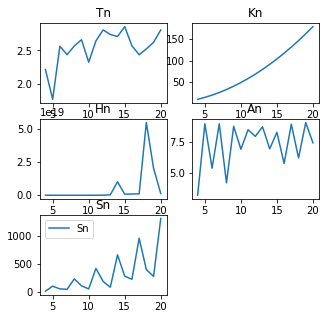

In [161]:
plt.subplot(3,2,1).set_title("Tn")
plt.plot(x, t_)
plt.subplot(3,2,2).set_title("Kn")
plt.plot(x, k_, label="Kn")
plt.subplot(3,2,3).set_title("Hn")
plt.plot(x, h_, label="Hn")
plt.subplot(3,2,4).set_title("An")
plt.plot(x, a_, label="An")
plt.subplot(3,2,5).set_title("Sn")
plt.plot(x, s_, label="Sn")
plt.legend()
plt.rcParams['figure.figsize'] = [5, 5]

plt.show()

# Question 2

In [148]:
A = matrix(10, 'S')
b = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
print()

In [151]:
A_, b_, x = gaussian_elim_pp(A, b)
print(x)

[ 1.832 -1.665  1.888  6.231 -1.639  12.221  0.634 -0.941  18.000 -0.000]


# Question 3

In [152]:
ex_3_A = matrix(10, 'K')@matrix(10, 'T')
ex_3_b = np.array([-4, -1, 0, 0, 0, 0, 0, 0, 10, 40])
numpy_sol = np.linalg.solve(ex_3_A, ex_3_b)
ex_3_A, indx = lu_pp(ex_3_A)
ex_3_x = lu_solve_pp(ex_3_A, ex_3_b, indx)

In [153]:
print(f"Solution X:\n {ex_3_x}")

Solution X:
 [[ 0.000]
 [ 1.000]
 [ 2.000]
 [ 3.000]
 [ 4.000]
 [ 5.000]
 [ 6.000]
 [ 7.000]
 [ 8.000]
 [ 9.000]]


In [154]:
print(f"Solution X:\n {numpy_sol.T}")

Solution X:
 [-0.000  1.000  2.000  3.000  4.000  5.000  6.000  7.000  8.000  9.000]


In [155]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(f"Matrix LU(Not Split):\n {ex_3_A}")

Matrix LU(Not Split):
 [[ 7.000 -2.000 -1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]
 [-0.286  5.429 -2.286 -1.000  0.000  0.000  0.000  0.000  0.000  0.000]
 [-0.143 -0.421  4.895 -2.421 -1.000  0.000  0.000  0.000  0.000  0.000]
 [ 0.000 -0.184 -0.495  4.618 -2.495 -1.000  0.000  0.000  0.000  0.000]
 [ 0.000  0.000 -0.204 -0.540  4.448 -2.540 -1.000  0.000  0.000  0.000]
 [ 0.000  0.000  0.000 -0.217 -0.571  4.333 -2.571 -1.000  0.000  0.000]
 [ 0.000  0.000  0.000  0.000 -0.225 -0.593  4.250 -2.593 -1.000  0.000]
 [ 0.000  0.000  0.000  0.000  0.000 -0.231 -0.610  4.187 -2.610 -1.000]
 [ 0.000  0.000  0.000  0.000  0.000  0.000 -0.235 -0.623  4.137 -2.623]
 [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000 -0.239 -0.634  5.098]]
